In [ ]:
!pip install openpyxl

In [ ]:
!pip install matplotlib pandas

In [3]:
from openpyxl import Workbook, load_workbook

wb = Workbook()

sheet1 = wb.active
sheet1.title = 'Лист1'
sheet2 = wb.create_sheet(title = 'Лист2')

for i in range(1, 11):
    for j in range(1, 11):
        sheet1.cell(row=i, column=j, value=i*j)

sheet2['A1']= 'Таблица умножения'
for i, row in enumerate(sheet1.iter_rows(min_row=1, max_row=10, min_col=1, max_col=10), start=2):
    for cell in row:
        sheet2.cell(row=i, column=cell.column, value=cell.value)

wb.save('Таблица умножения.xlsx')

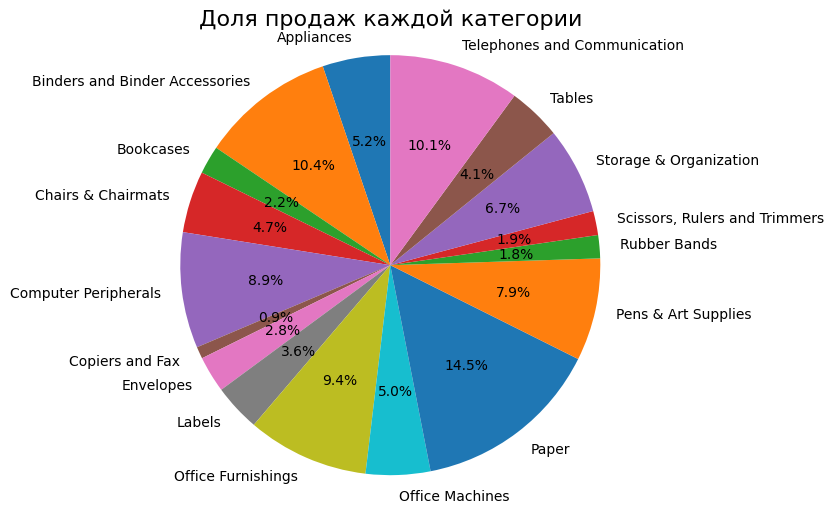

In [6]:
from openpyxl import Workbook, load_workbook
import matplotlib.pyplot as plt
import pandas as pd

file_name = 'SuperStoreUS-2015.xlsx'
workbook = load_workbook(file_name)

sheet = workbook['Orders']

data = []
for row in sheet.iter_rows(min_row=2, values_only=True): 
    category = row[10]
    sales = row[24]
    data.append((category, sales))

df = pd.DataFrame(data, columns=['Category', 'Sales'])

sales_summary = df.groupby('Category')['Sales'].sum()

plt.figure(figsize=(9, 6))
sales_summary.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Доля продаж каждой категории', fontsize=16)
plt.ylabel('')
plt.axis('equal')
plt.savefig("sales_pie_chart.png")
plt.show()